<a href="https://colab.research.google.com/github/mohansharma077/treeleaf-internship-assignment/blob/main/loanprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [495]:

#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder



In [496]:
df=pd.read_csv('/content/bank_loan.csv')
df

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,10,34,M,9,180.0,93023,1,8.9,3,0,Home Owner,1,0,0,0.0,0
1,17,38,M,14,130.0,95010,4,4.7,3,134,Rent,1,0,0,0.0,0
2,19,46,M,21,193.0,91604,2,8.1,3,0,Rent,1,0,0,0.0,0
3,30,38,M,13,NaN,94104,1,3.3,2,0,Rent,1,0,1,1.0,1
4,39,42,M,18,NaN,94114,3,5.0,3,0,Rent,1,1,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,4884,38,F,13,129.0,92646,3,4.1,3,0,Rent,1,0,1,1.0,1
476,4928,43,O,19,NaN,94720,1,0.7,2,0,Rent,1,0,1,1.0,1
477,4942,28,F,4,NaN,90049,2,1.6,2,0,Home Mortage,1,0,0,1.0,0
478,4963,46,O,20,NaN,90065,3,3.0,3,0,Home Mortage,1,0,1,1.0,1


In [497]:
df.shape

(480, 16)

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  480 non-null    int64  
 1   Age                 480 non-null    int64  
 2   Gender              480 non-null    object 
 3   Experience          480 non-null    int64  
 4   Income              413 non-null    float64
 5   ZIP Code            480 non-null    int64  
 6   Family              480 non-null    int64  
 7   CCAvg               480 non-null    float64
 8   Education           480 non-null    int64  
 9   Mortgage            480 non-null    int64  
 10  Home Ownership      480 non-null    object 
 11  Personal Loan       480 non-null    object 
 12  Securities Account  480 non-null    int64  
 13  CD Account          480 non-null    int64  
 14  Online              440 non-null    float64
 15  CreditCard          480 non-null    int64  
dtypes: float

We can see there are three formats of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are  Gender, Home Ownership, Perosnal loan.
int64: It represents the integer variables. Age, Experience , Family, Educatin,Mortgage, Securities account,Cd account, Credit card is of this format.
float64: It represents the variable that has some decimal values involved.Income, CCAvg, Online. They are also numerical

In [499]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,413.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,440.000000,480.000000
mean,2390.650000,52.043750,19.843750,144.123487,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.609091,0.297917
std,1394.393674,74.024316,11.582443,32.694626,1759.223753,1.115393,2.097681,0.753373,160.847862,0.331064,0.455004,0.488510,0.457820
min,10.000000,0.000000,0.000000,8.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1166.500000,34.000000,9.000000,120.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2342.000000,45.000000,20.000000,142.000000,93407.000000,3.000000,3.800000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,0.000000,1.000000,1.000000,1.000000
max,4981.000000,978.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000


In [500]:
df.isna().sum()

ID                     0
Age                    0
Gender                 0
Experience             0
Income                67
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Home Ownership         0
Personal Loan          0
Securities Account     0
CD Account             0
Online                40
CreditCard             0
dtype: int64

In [501]:
#removing the null data

In [502]:
df=df.fillna(df.mean())

In [503]:
df

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,10,34,M,9,180.000000,93023,1,8.9,3,0,Home Owner,1,0,0,0.0,0
1,17,38,M,14,130.000000,95010,4,4.7,3,134,Rent,1,0,0,0.0,0
2,19,46,M,21,193.000000,91604,2,8.1,3,0,Rent,1,0,0,0.0,0
3,30,38,M,13,144.123487,94104,1,3.3,2,0,Rent,1,0,1,1.0,1
4,39,42,M,18,144.123487,94114,3,5.0,3,0,Rent,1,1,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,4884,38,F,13,129.000000,92646,3,4.1,3,0,Rent,1,0,1,1.0,1
476,4928,43,O,19,144.123487,94720,1,0.7,2,0,Rent,1,0,1,1.0,1
477,4942,28,F,4,144.123487,90049,2,1.6,2,0,Home Mortage,1,0,0,1.0,0
478,4963,46,O,20,144.123487,90065,3,3.0,3,0,Home Mortage,1,0,1,1.0,1


In [504]:
print(df.isna().sum())

ID                    0
Age                   0
Gender                0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [505]:
#rename all the columns by replacing the space with '_' and converting in lowercase
df=df.rename(columns=lambda x: x.replace(' ','_').lower())

In [506]:
rows_to_delete = df[df['personal_loan']==' '].index
#removing the empty row

In [507]:
df.drop(rows_to_delete, inplace=True)


In [508]:
df

,id,age,gender,experience,income,zip_code,family,ccavg,education,mortgage,home_ownership,personal_loan,securities_account,cd_account,online,creditcard
0,10,34,M,9,180.000000,93023,1,8.9,3,0,Home Owner,1,0,0,0.0,0
1,17,38,M,14,130.000000,95010,4,4.7,3,134,Rent,1,0,0,0.0,0
2,19,46,M,21,193.000000,91604,2,8.1,3,0,Rent,1,0,0,0.0,0
3,30,38,M,13,144.123487,94104,1,3.3,2,0,Rent,1,0,1,1.0,1
4,39,42,M,18,144.123487,94114,3,5.0,3,0,Rent,1,1,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,4884,38,F,13,129.000000,92646,3,4.1,3,0,Rent,1,0,1,1.0,1
476,4928,43,O,19,144.123487,94720,1,0.7,2,0,Rent,1,0,1,1.0,1
477,4942,28,F,4,144.123487,90049,2,1.6,2,0,Home Mortage,1,0,0,1.0,0
478,4963,46,O,20,144.123487,90065,3,3.0,3,0,Home Mortage,1,0,1,1.0,1


In [509]:
df['personal_loan'].value_counts()

1    479
Name: personal_loan, dtype: int64

<Axes: xlabel='personal_loan', ylabel='count'>

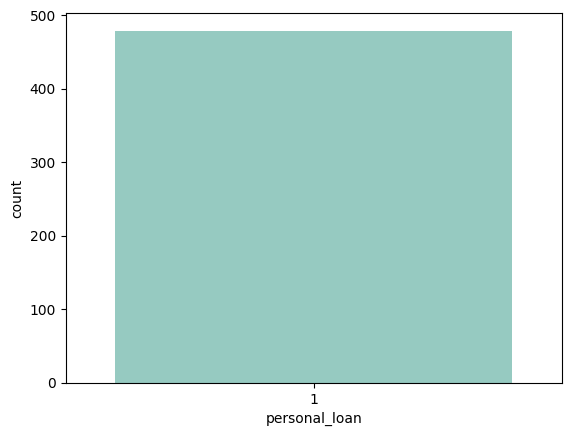

In [510]:
sns.countplot(x='personal_loan',data=df)

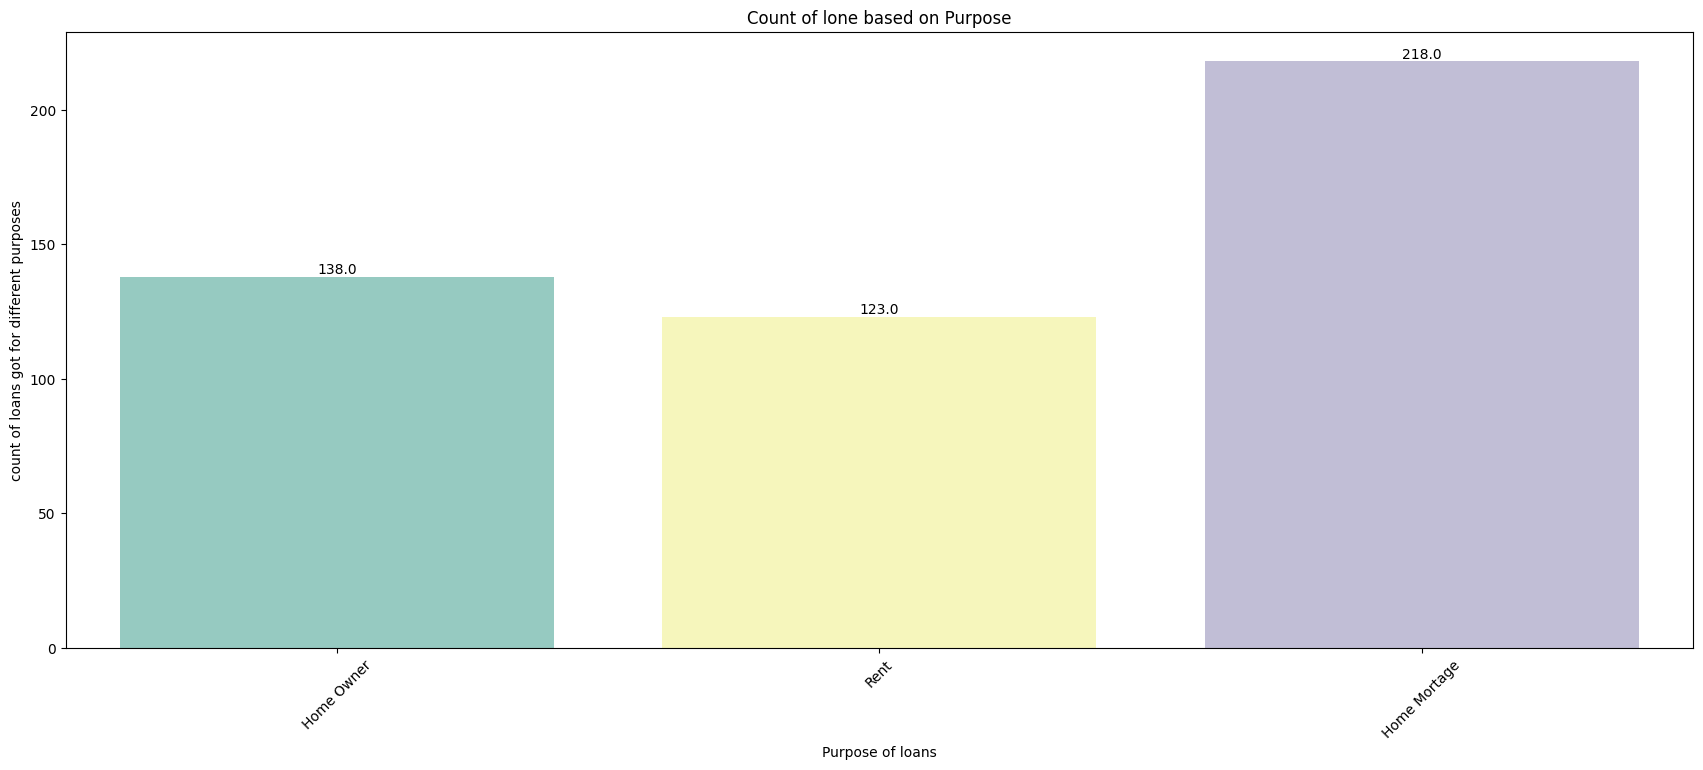

In [511]:

plt.figure(figsize=(21,8))
plot=sns.countplot(x='home_ownership',data=df)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xticks(rotation=45)
plt.title("Count of lone based on Purpose")
plt.xlabel('Purpose of loans')
plt.ylabel('count of loans got for different purposes')
plt.show()

In [512]:
#as we can see that maximum loan is accepted for home mortgage and then home owner and then rent

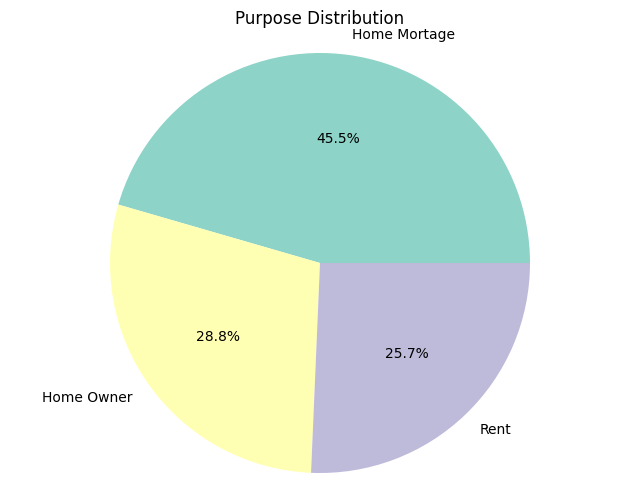

In [513]:

import seaborn as sns
purpose_counts = df['home_ownership'].value_counts()
plt.figure(figsize=(8, 6))
sns.set_palette("Set3")
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Purpose Distribution')
plt.show()

Text(0.5, 0, 'Gender')

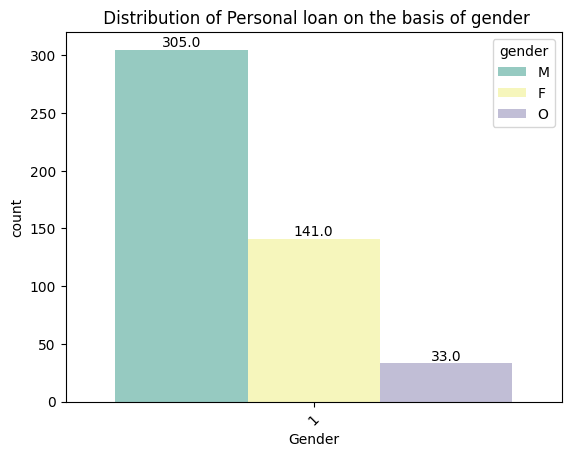

In [514]:
#distribution of loan on the basis of Gender
plot=sns.countplot(x='personal_loan', hue="gender", data=df)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xticks(rotation=45)
plt.title(" Distribution of Personal loan on the basis of gender")

plt.xlabel('Gender')

In [515]:
# most loan are accepted for male and then female .

In [516]:
#Distribution of loan on the basis of age

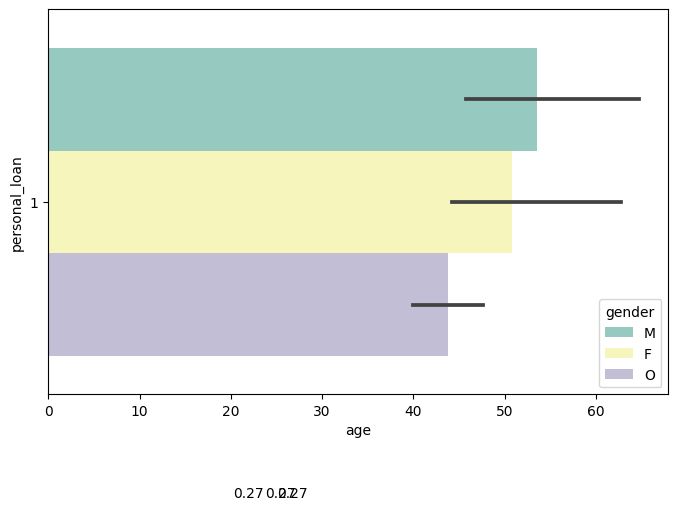

In [517]:
#Distribution of Loan on the basis of age

plt.figure(figsize=(8,5))
plot = sns.barplot(x="age", y="personal_loan", hue='gender', data=df)

# Add count labels on top of each bar with 2 digits after decimal point
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.2f}', ha="center")

plt.show()


<Axes: xlabel='income', ylabel='personal_loan'>

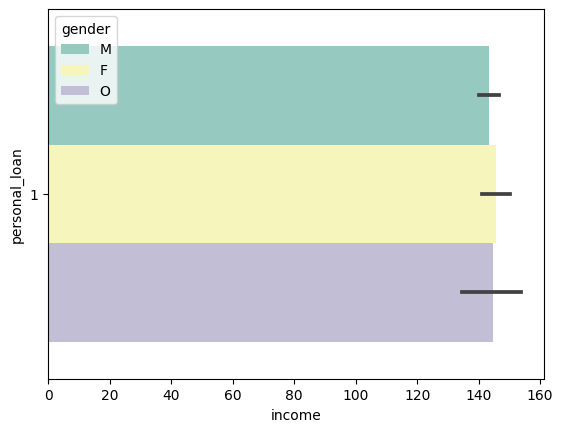

In [518]:

#countplot of income vs perosonal income based on getting loan
sns.barplot(x='income',y='personal_loan',hue="gender",data=df)

<Axes: xlabel='personal_loan', ylabel='education'>

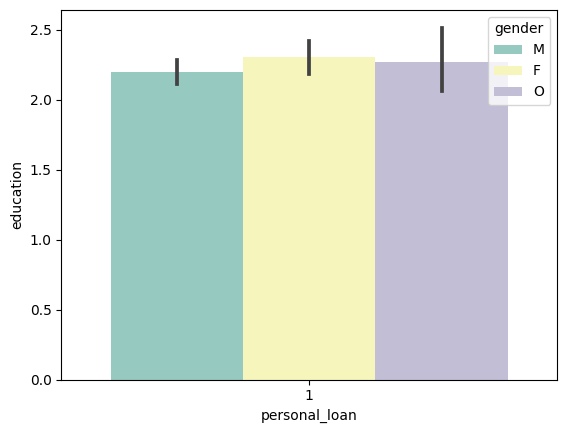

In [519]:

#countplot of education  vs personal loan based on gender
sns.barplot(x='personal_loan',y='education',data=df,hue='gender')

<Axes: xlabel='personal_loan', ylabel='mortgage'>

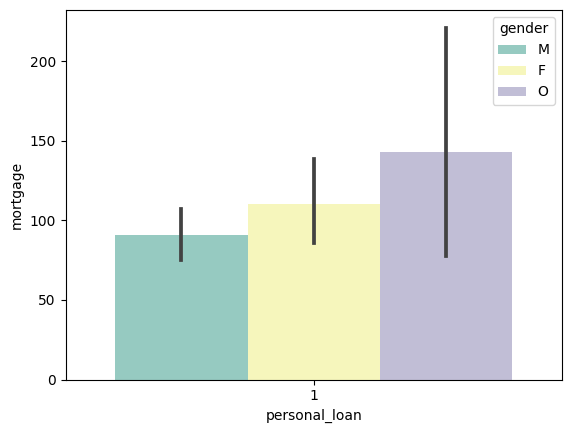

In [520]:
sns.barplot(x="personal_loan",y="mortgage",hue="gender" ,data=df)

Text(0.5, 0, 'Education')

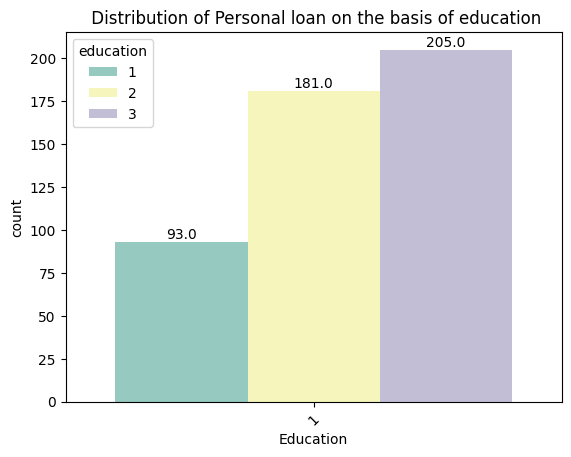

In [521]:
#distribution of loan on the basis of Education
plot=sns.countplot(x='personal_loan', hue="education", data=df)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xticks(rotation=45)
plt.title(" Distribution of Personal loan on the basis of education")

plt.xlabel('Education')

In [522]:
dummies =pd.get_dummies(df['home_ownership'],drop_first=False)


In [523]:
df=pd.concat([df,dummies],axis=1,)

In [524]:
dummies1=pd.get_dummies(df['gender'],drop_first=False)


In [525]:
df=pd.concat([df,dummies1],axis=1,)

In [526]:
#rename all the columns by replacing the space with '_' and converting in lowercase
df=df.rename(columns=lambda x: x.replace(' ','_').lower())

In [527]:
df

,id,age,gender,experience,income,zip_code,family,ccavg,education,mortgage,...,securities_account,cd_account,online,creditcard,home_mortage,home_owner,rent,f,m,o
0,10,34,M,9,180.000000,93023,1,8.9,3,0,...,0,0,0.0,0,0,1,0,0,1,0
1,17,38,M,14,130.000000,95010,4,4.7,3,134,...,0,0,0.0,0,0,0,1,0,1,0
2,19,46,M,21,193.000000,91604,2,8.1,3,0,...,0,0,0.0,0,0,0,1,0,1,0
3,30,38,M,13,144.123487,94104,1,3.3,2,0,...,0,1,1.0,1,0,0,1,0,1,0
4,39,42,M,18,144.123487,94114,3,5.0,3,0,...,1,1,1.0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,4884,38,F,13,129.000000,92646,3,4.1,3,0,...,0,1,1.0,1,0,0,1,1,0,0
476,4928,43,O,19,144.123487,94720,1,0.7,2,0,...,0,1,1.0,1,0,0,1,0,0,1
477,4942,28,F,4,144.123487,90049,2,1.6,2,0,...,0,0,1.0,0,1,0,0,1,0,0
478,4963,46,O,20,144.123487,90065,3,3.0,3,0,...,0,1,1.0,1,1,0,0,0,0,1


In [528]:
df=df.drop('gender',axis=1)

In [529]:
df=df.drop('home_ownership',axis=1)

In [530]:
df=df.drop('id',axis=1)

In [531]:
df=df.drop('zip_code',axis=1)

In [532]:
df

,age,experience,income,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard,home_mortage,home_owner,rent,f,m,o
0,34,9,180.000000,1,8.9,3,0,1,0,0,0.0,0,0,1,0,0,1,0
1,38,14,130.000000,4,4.7,3,134,1,0,0,0.0,0,0,0,1,0,1,0
2,46,21,193.000000,2,8.1,3,0,1,0,0,0.0,0,0,0,1,0,1,0
3,38,13,144.123487,1,3.3,2,0,1,0,1,1.0,1,0,0,1,0,1,0
4,42,18,144.123487,3,5.0,3,0,1,1,1,1.0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,38,13,129.000000,3,4.1,3,0,1,0,1,1.0,1,0,0,1,1,0,0
476,43,19,144.123487,1,0.7,2,0,1,0,1,1.0,1,0,0,1,0,0,1
477,28,4,144.123487,2,1.6,2,0,1,0,0,1.0,0,1,0,0,1,0,0
478,46,20,144.123487,3,3.0,3,0,1,0,1,1.0,1,1,0,0,0,0,1


In [533]:
#Is there a correlation between any of these features?
df_model=df.copy()

In [534]:
df_corr=df_model.corr()

In [535]:
df_corr

,age,experience,income,family,ccavg,education,mortgage,securities_account,cd_account,online,creditcard,home_mortage,home_owner,rent,f,m,o
age,1.000000,0.126233,0.056529,-0.006636,0.015525,-0.024359,0.043724,-0.034094,-0.004278,0.000070,-0.009691,-0.004512,-0.022346,0.028309,-0.010834,0.026208,-0.030271
experience,0.126233,1.000000,-0.008420,0.008070,-0.023079,-0.020964,0.042735,-0.006125,0.057984,0.035436,0.030569,0.062052,-0.055050,-0.013666,0.049599,-0.031718,-0.029022
income,0.056529,-0.008420,1.000000,-0.005288,0.181650,0.119003,0.165609,-0.065934,0.063006,0.051927,0.009206,0.030234,-0.033272,0.000028,0.033087,-0.033209,0.003522
family,-0.006636,0.008070,-0.005288,1.000000,0.008924,-0.239602,0.065886,-0.105208,-0.001420,-0.037300,0.052548,0.045577,-0.066752,0.017246,-0.036832,0.050952,-0.030474
ccavg,0.015525,-0.023079,0.181650,0.008924,1.000000,0.077254,0.028837,0.016288,0.035649,-0.005414,0.024070,0.026042,-0.046515,0.018536,0.025639,-0.012023,-0.023306
education,-0.024359,-0.020964,0.119003,-0.239602,0.077254,1.000000,-0.024891,-0.042107,-0.071507,0.009060,-0.038979,0.033543,-0.001635,-0.036540,0.060999,-0.065204,0.014049
mortgage,0.043724,0.042735,0.165609,0.065886,0.028837,-0.024891,1.000000,-0.015343,0.087713,0.067165,0.041998,0.010812,0.071497,-0.086444,0.041637,-0.077673,0.072568
securities_account,-0.034094,-0.006125,-0.065934,-0.105208,0.016288,-0.042107,-0.015343,1.000000,0.464045,0.050227,-0.012574,0.046773,-0.045762,-0.005877,-0.036835,0.049772,-0.028229
cd_account,-0.004278,0.057984,0.063006,-0.001420,0.035649,-0.071507,0.087713,0.464045,1.000000,0.355085,0.513621,0.048706,-0.054064,0.000526,0.038163,-0.049097,0.024556
online,0.000070,0.035436,0.051927,-0.037300,-0.005414,0.009060,0.067165,0.050227,0.355085,1.000000,-0.045630,-0.026050,0.011334,0.017946,-0.004486,0.004930,-0.001289


<Axes: >

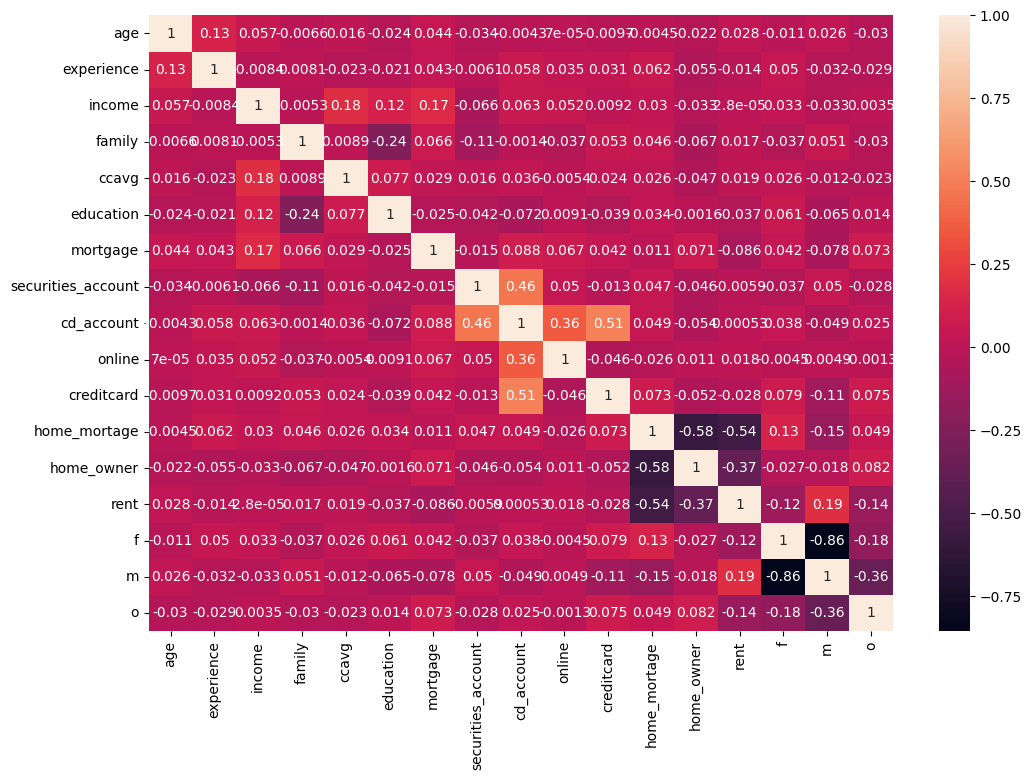

In [536]:

plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True)

In [537]:


df_model=df_model.drop(['personal_loan'],axis=1)


In [538]:

#extracting major features only
df_features=df[['securities_account','cd_account','online','creditcard']]
df_features.head()
df_label=df[['personal_loan']]

In [539]:
X=df_features.values
y=df_label.values

In [540]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [541]:

#performing the regression on various models and storing the scores
scores={}
def classifier():
    dict_models={
        'Linear Regression':LinearRegression(),
        'Support Vector Machine':SVR(kernel='linear',degree=1),
        'Decision Tree':DecisionTreeRegressor(criterion='squared_error'),
        'Random Forest':RandomForestRegressor(n_estimators=150,criterion='squared_error',verbose=0)
    }
    X_train.shape
    y_train.shape

    for key,value in dict_models.items():
        regression=value.fit(X_train,y_train)
        score=cross_val_score(regression,X,y,scoring='neg_mean_squared_error')
        score=np.sqrt(-score.mean())
        scores[key]=score
        print(
            f'Model Name: {key},RMSE score: {(score.mean())}')

In [542]:

classifier()

Model Name: Linear Regression,RMSE score: 0.0
Model Name: Support Vector Machine,RMSE score: 0.0
Model Name: Decision Tree,RMSE score: 0.0
Model Name: Random Forest,RMSE score: 0.0


In [543]:
#scaling the values(although it doesn't change the rmse)
from sklearn.preprocessing import MinMaxScaler
sc_s=MinMaxScaler()
X_train=sc_s.fit_transform(X_train)
X_test=sc_s.transform(X_test)

In [544]:

#labelling the categorical column values of the dataframe
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=LabelEncoder().fit_transform(df[column])

In [545]:

X=df_model
y=df[['personal_loan']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [546]:

new=RandomForestRegressor()
model=new.fit(X_train,y_train)
score=cross_val_score(model,X,y,scoring='neg_mean_squared_error')
score=np.sqrt(-score.mean())
scores['Random Forest Labled']=score

In [547]:
#Using Decision Tree Regressor
test=DecisionTreeRegressor()
model=new.fit(X_train,y_train)
score=cross_val_score(model,X,y,scoring='neg_mean_squared_error')
score=np.sqrt(-score.mean())
scores['Decision Tree Labled']=score

In [548]:
scores=(pd.Series(scores)).to_frame()

In [549]:

#renaming the column names
scores=scores.rename(columns={0:'RMSE Error'})
scores

,RMSE Error
Linear Regression,-0.0
Support Vector Machine,-0.0
Decision Tree,-0.0
Random Forest,-0.0
Random Forest Labled,-0.0
Decision Tree Labled,-0.0


<Axes: >

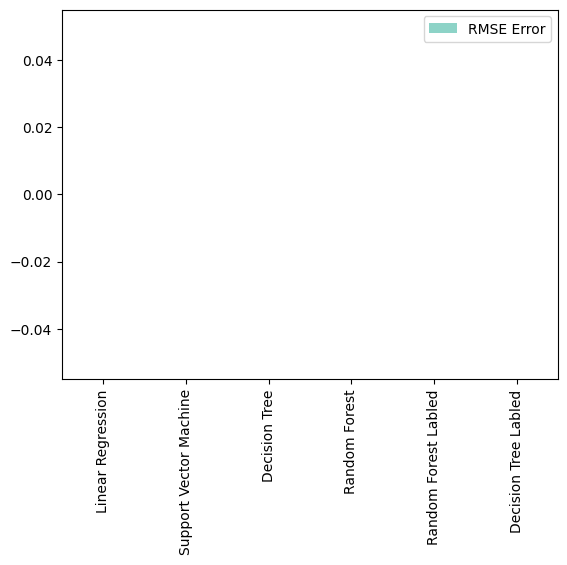

In [550]:
#plotting the scores of each model for better comparison
scores.plot(kind='bar')